In [41]:
from music21 import *
import os
import numpy as np
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

Using TensorFlow backend.


In [58]:
def read_midi(file):
    print("Loading Music File " + file)
    
    notes = []
    notes_to_parse = None
    
    midi = converter.parse(file)    
    s2 = instrument.partitionByInstrument(midi)
    
    for part in s2.parts:
        if 'Piano' in str(part): 
            notes_to_parse = part.recurse() 
            for element in notes_to_parse:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))
        if 'Drum' in str(part): 
            notes_to_parse = part.recurse() 
            for element in notes_to_parse:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))
    return np.array(notes)


In [59]:
path = '/Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files'
files=[i for i in os.listdir(path) if i.endswith(".mid")]
notes_array = np.array([read_midi(path+"/"+i) for i in files])

Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schumm-1.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schumm-2.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schub_d960_4.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schumm-3.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schub_d960_1.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schumm-6.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schumm-4.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schub_d960_2.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schub_d960_3.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schumm-5.mid
Loading Music File /Users/lonetitan/Documents/Self/MusicGenerator/MIDI_files/schuim-

In [60]:
notes_array

array([array(['G4', 'G3', 'A4', ..., '5.7', '0', '0.4.7'], dtype='<U6'),
       array(['8.0', '3.8', '1.7', ..., '8.0.3', '3.8', '8.0.3'], dtype='<U7'),
       array([], dtype=float64),
       array(['F3', '0.5', 'F3', '0.5', 'F3', '0.5', 'F3', '0.5', 'B-4', 'G#4',
       'F3', 'G#4', '0.5', 'B-4', 'G#4', 'F3', 'G4', '0.4', 'G#4', 'B-4',
       '8.0', 'F3', '0.5', 'G#4', 'B-4', '8.0', 'F3', '0.5', 'B-4', 'G#4',
       'F3', 'G#4', '0.5', 'B-4', 'G#4', 'F3', '7.0', '0.4', 'C5', '5.8',
       'F3', '0.5', 'C5', '5.8', 'F3', '0.5', 'F#5', '5.8', 'C#3', 'G#4',
       'F5', '1.5', 'F#5', '5.9', 'C3', '5.9', '0.3.5', 'B-4', 'F5',
       'B-2', 'B-5', '10.1.5', '5.8', 'F3', '0.5', '8.0', 'C3', '7.10',
       '5.8', '0.5', '7.10', 'G#4', 'C5', 'C3', 'C#5', '7.10', 'C5',
       '0.4', 'E5', '5.8.0', 'F3', '0.5', '5.8.0', 'F3', '0.5', 'B-4',
       'G#4', 'F3', 'G#4', '0.5', 'B-4', 'G#4', 'F3', 'G4', '0.4', 'G#4',
       'B-4', '8.0', 'F3', '0.5', 'G#4', 'B-4', '8.0', 'F3', '0.5', 'B-4',
       

In [61]:
notes_ = [element for note_ in notes_array for element in note_]
unique_notes = list(set(notes_))
print(len(unique_notes))

304


(array([187.,  41.,  26.,  11.,   6.,   9.,  12.,   6.,   3.,   3.]),
 array([1.0000e+00, 1.4790e+02, 2.9480e+02, 4.4170e+02, 5.8860e+02,
        7.3550e+02, 8.8240e+02, 1.0293e+03, 1.1762e+03, 1.3231e+03,
        1.4700e+03]),
 <a list of 10 Patch objects>)

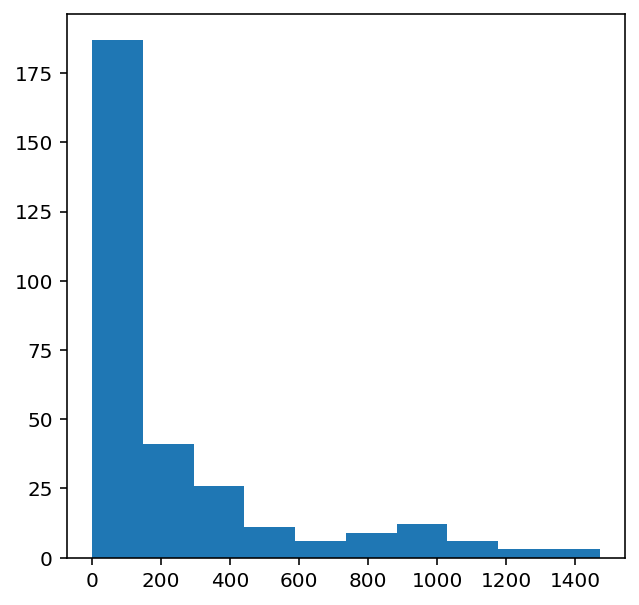

In [62]:
from collections import Counter
import matplotlib.pyplot as plt
freq = dict(Counter(notes_))
no=[count for _,count in freq.items()]
plt.figure(figsize=(5,5))
plt.hist(no)

In [63]:
frequent_notes = [note_ for note_, count in freq.items() if count>=40]
print(len(frequent_notes))


177


In [64]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

In [65]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [66]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [67]:
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [68]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [69]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [70]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

WaveNet

In [101]:
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 100)           17700     
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 32, 64)            19264     
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 16, 128)           24704     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 8, 128)          

In [102]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [121]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Train on 51890 samples, validate on 12973 samples
Epoch 1/50
15104/51890 [=======>......................] - ETA: 7s - loss: 2.3118

KeyboardInterrupt: 

In [104]:
from keras.models import load_model
model = load_model('best_model.h5')

In [122]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(20):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[62, 86, 75, 75, 162, 49, 49, 157, 49, 157, 24, 8, 83, 8, 83, 84, 83, 121, 83, 84]


In [123]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [125]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.ChurchBells()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.ChurchBells()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [126]:
convert_to_midi(predicted_notes)
